In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
pd.__version__


'1.2.4'

In [4]:
df=pd.read_csv('Salary by Education.csv')

In [5]:
df.head()

,Degree Level,Nationality,Gender,Year Quarter,Salary,Currency
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR
2,Primary,Saudi,Female,2017 Q1,4172,SAR
3,Primary,Saudi,Male,2017 Q1,6172,SAR
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR


In [6]:
print(df.columns)
df.shape

Index(['Degree Level', 'Nationality', 'Gender', 'Year Quarter', 'Salary',
       'Currency'],
      dtype='object')


(504, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree Level  504 non-null    object
 1   Nationality   504 non-null    object
 2   Gender        504 non-null    object
 3   Year Quarter  504 non-null    object
 4   Salary        504 non-null    int64 
 5   Currency      504 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


In [8]:
df.mean()

Salary    8950.031746
dtype: float64

//

replace columns's space with'_'

two ways:

//

In [9]:
df = df.rename(columns=lambda s: s.replace(' ','_').lower())
df.columns


Index(['degree_level', 'nationality', 'gender', 'year_quarter', 'salary',
       'currency'],
      dtype='object')

In [10]:
cols = [col.replace(' ','_').lower() for col in df.columns]
cols

['degree_level', 'nationality', 'gender', 'year_quarter', 'salary', 'currency']

//

spliting year_quarter into year and quarter 

//


In [11]:
df['quarter'] = df['year_quarter'].apply(lambda x: x.split()[1])
df.head()

,degree_level,nationality,gender,year_quarter,salary,currency,quarter
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR,Q1
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR,Q1
2,Primary,Saudi,Female,2017 Q1,4172,SAR,Q1
3,Primary,Saudi,Male,2017 Q1,6172,SAR,Q1
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR,Q2


In [12]:
df= df.rename(columns={'year_quarter':'year'})
df.head()

,degree_level,nationality,gender,year,salary,currency,quarter
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR,Q1
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR,Q1
2,Primary,Saudi,Female,2017 Q1,4172,SAR,Q1
3,Primary,Saudi,Male,2017 Q1,6172,SAR,Q1
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR,Q2


In [13]:
df['year']=df['year'].apply(lambda x: x.split()[0])
df.head()

,degree_level,nationality,gender,year,salary,currency,quarter
0,Primary,NonSaudi,Female,2017,1590,SAR,Q1
1,Primary,NonSaudi,Male,2017,2173,SAR,Q1
2,Primary,Saudi,Female,2017,4172,SAR,Q1
3,Primary,Saudi,Male,2017,6172,SAR,Q1
4,Primary,NonSaudi,Female,2017,1597,SAR,Q2


In [14]:
df.describe()


,salary
count,504.000000
mean,8950.031746
std,6372.635277
min,1331.000000
25%,4194.000000
50%,7890.500000
75%,12448.750000
max,35622.000000


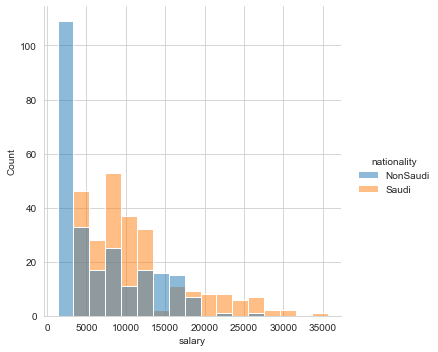

In [15]:
sns.set_style('whitegrid')  
sns.displot(x='salary',hue='nationality', data=df);

In [16]:
df.groupby(['gender', 'degree_level']).mean()

salary
gender degree_level               
Female Bachelor        8417.750000
       Diploma         6694.055556
       Doctorate      17172.750000
       Intermediate    3161.000000
       Master Degree  11605.166667
       Primary         2929.444444
       Secondary       3671.750000
Male   Bachelor       10653.361111
       Diploma         7379.333333
       Doctorate      22498.166667
       Intermediate    5042.055556
       Master Degree  15990.583333
       Primary         4208.638889
       Secondary       5876.388889

In [17]:
df.groupby(['nationality', 'degree_level']).mean().sort_values(by=['degree_level'])


,,salary
nationality,degree_level,
NonSaudi,Bachelor,7487.305556
Saudi,Bachelor,11583.805556
NonSaudi,Diploma,4500.361111
Saudi,Diploma,9573.027778
NonSaudi,Doctorate,15698.888889
Saudi,Doctorate,23972.027778
NonSaudi,Intermediate,1990.055556
Saudi,Intermediate,6213.000000
NonSaudi,Master Degree,12613.305556


In [18]:
df.groupby(['nationality', 'degree_level']).min().sort_values(by=['degree_level'])


,,gender,year,salary,currency,quarter
nationality,degree_level,,,,,
NonSaudi,Bachelor,Female,2017,5809,SAR,Q1
Saudi,Bachelor,Female,2017,9239,SAR,Q1
NonSaudi,Diploma,Female,2017,2549,SAR,Q1
Saudi,Diploma,Female,2017,8388,SAR,Q1
NonSaudi,Doctorate,Female,2017,10259,SAR,Q1
Saudi,Doctorate,Female,2017,16204,SAR,Q1
NonSaudi,Intermediate,Female,2017,1433,SAR,Q1
Saudi,Intermediate,Female,2017,4067,SAR,Q1
NonSaudi,Master Degree,Female,2017,8630,SAR,Q1


In [19]:
df.groupby(['nationality', 'degree_level']).max().sort_values(by=['degree_level'])


,,gender,year,salary,currency,quarter
nationality,degree_level,,,,,
NonSaudi,Bachelor,Male,2021,9096,SAR,Q4
Saudi,Bachelor,Male,2021,13744,SAR,Q4
NonSaudi,Diploma,Male,2021,5625,SAR,Q4
Saudi,Diploma,Male,2021,10814,SAR,Q4
NonSaudi,Doctorate,Male,2021,26296,SAR,Q4
Saudi,Doctorate,Male,2021,35622,SAR,Q4
NonSaudi,Intermediate,Male,2021,2539,SAR,Q4
Saudi,Intermediate,Male,2021,8178,SAR,Q4
NonSaudi,Master Degree,Male,2021,17202,SAR,Q4


//



(there is high realtionship between nationality and salary) 



//

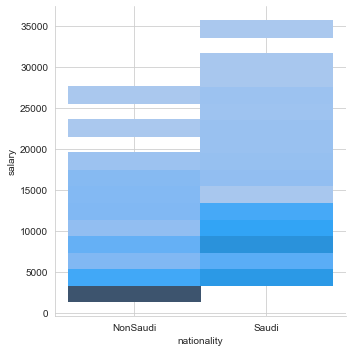

In [20]:
sns.displot(y='salary',x='nationality', data=df);

//


Is there relation between gender and salary ?


//

In [21]:
df.groupby(['gender', 'degree_level']).mean().sort_values(by=['degree_level'])


,,salary
gender,degree_level,
Female,Bachelor,8417.750000
Male,Bachelor,10653.361111
Female,Diploma,6694.055556
Male,Diploma,7379.333333
Female,Doctorate,17172.750000
Male,Doctorate,22498.166667
Female,Intermediate,3161.000000
Male,Intermediate,5042.055556
Female,Master Degree,11605.166667


//


is there relation between years and salary?



//

In [22]:
df_year=df.groupby(['year','quarter']).mean().sort_values(by=['year','quarter'])
df_year





salary
year quarter             
2017 Q1       8777.821429
     Q2       8644.857143
     Q3       8622.250000
     Q4       8427.678571
2018 Q1       8551.678571
     Q2       9013.642857
     Q3       9062.928571
     Q4       8576.964286
2019 Q1       8865.107143
     Q2       9189.892857
     Q3       9106.571429
     Q4       9294.571429
2020 Q1       9443.642857
     Q2       8662.214286
     Q3       8609.214286
     Q4       9103.142857
2021 Q1       9550.607143
     Q2       9597.785714